In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install bioinfokit


  Created wheel for bioinfokit: filename=bioinfokit-2.1.0-py3-none-any.whl size=58685 sha256=0bae9aacb504332defde7c0c1af416e08c25be9e24964e82dbe23e57c2f4f3d1
  Stored in directory: c:\users\ksana\appdata\local\pip\cache\wheels\c9\ab\ed\8a7fde0a63653b75ac029d67598265d185e5915dfb594ddc59
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7094 sha256=0e3d1378601061e365cef1fb00c8ecc6967a917cb8c02eee9d1b15ad89665397
  Stored in directory: c:\users\ksana\appdata\local\pip\cache\wheels\6b\1d\79\4326d5f3a7d86fb9900e5564e7a0f98b552da5103ca762f24f
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.7-py3-none-any.whl size=32154 sha256=f3782bc511afa024988218e660933e83e0b18673808b97e87757b2c95d35c1fc
  Stored in directory: c:\users\ksana\appdata\local\pip\cache\wheels\32\41\5f\d0f29cd092d042d8e8a87d7bbe42193166aa555ff38b377343
Successfully built bioinfokit adjustText matplotlib-venn


In [32]:
df = pd.read_csv('https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')
df.shape
df.head()
df.dtypes
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [33]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


Cnverting object datatype to integers using LabelEncoder

In [34]:
columns=df.columns
for i in columns:
    if i!='Age':
        df[i]=lb.fit_transform(df[i])

In [35]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,6,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,1


In [36]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [37]:
df['Gender'].value_counts()
df['VisitFrequency'].value_counts()
df['Like'].value_counts()


2     229
1     187
8     169
3     160
0     152
9     152
10    143
6      73
7      71
5      59
4      58
Name: Like, dtype: int64

DATA EXPLORATION:


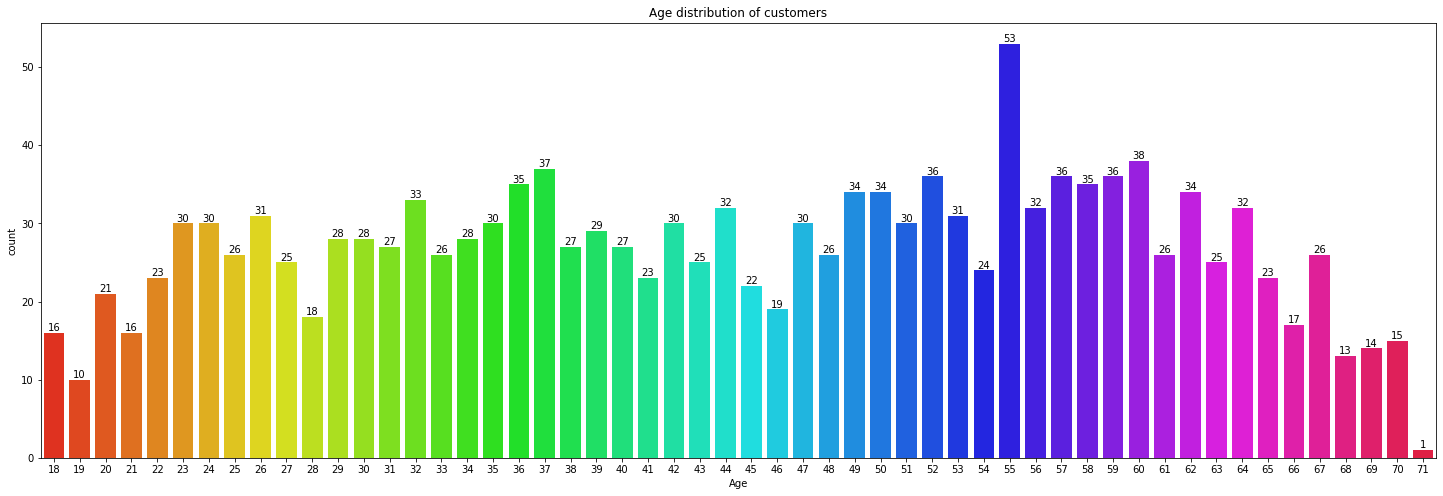

In [38]:
plt.rcParams['figure.figsize'] = (25, 8)
f = sns.countplot(x=df['Age'],palette = 'hsv')
f.bar_label(f.containers[0])
plt.title('Age distribution of customers')
plt.show()

Inference is that most customers are between the age range 35-40

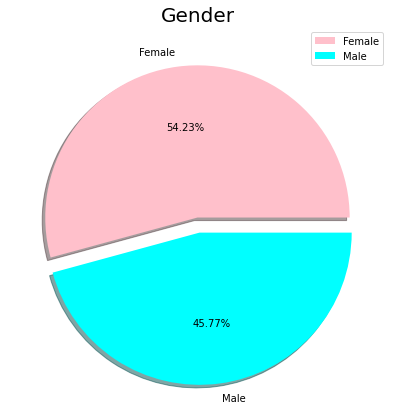

In [39]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['pink', 'cyan']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

Inference is that most customers are in the age range 35-40

In [40]:
df.corr()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
yummy,1.000000,0.253807,0.008742,-0.087027,-0.151853,0.106836,0.105036,0.687280,-0.061727,0.247183,-0.419852,-0.251600,-0.281653,-0.023896,-0.062545
convenient,0.253807,1.000000,0.028928,0.036451,-0.106948,0.243062,0.151574,0.289755,-0.163961,0.099230,-0.340797,-0.247663,-0.070597,-0.035920,-0.041402
spicy,0.008742,0.028928,1.000000,-0.041322,0.053932,0.020276,0.017203,0.061154,0.045979,0.106252,0.032834,0.022923,0.146217,-0.017184,0.051015
fattening,-0.087027,0.036451,-0.041322,1.000000,0.319283,0.045600,-0.026640,-0.087561,0.089134,-0.338401,0.146054,-0.015972,-0.139254,0.005929,-0.059707
greasy,-0.151853,-0.106948,0.053932,0.319283,1.000000,-0.058212,-0.073264,-0.163536,0.147283,-0.211186,0.321879,0.098425,-0.233554,0.007803,0.021801
fast,0.106836,0.243062,0.020276,0.045600,-0.058212,1.000000,0.252133,0.145836,-0.201694,0.033596,-0.137993,-0.067114,-0.020558,0.011130,-0.049027
cheap,0.105036,0.151574,0.017203,-0.026640,-0.073264,0.252133,1.000000,0.139485,-0.721593,0.130003,-0.125602,-0.057818,0.016958,0.032753,-0.116050
tasty,0.687280,0.289755,0.061154,-0.087561,-0.163536,0.145836,0.139485,1.000000,-0.104884,0.226271,-0.437086,-0.287870,-0.194576,-0.023878,-0.044385
expensive,-0.061727,-0.163961,0.045979,0.089134,0.147283,-0.201694,-0.721593,-0.104884,1.000000,-0.069873,0.199748,0.084583,-0.070851,-0.009614,0.144113
healthy,0.247183,0.099230,0.106252,-0.338401,-0.211186,0.033596,0.130003,0.226271,-0.069873,1.000000,-0.173722,-0.024514,0.021366,-0.008230,-0.042455


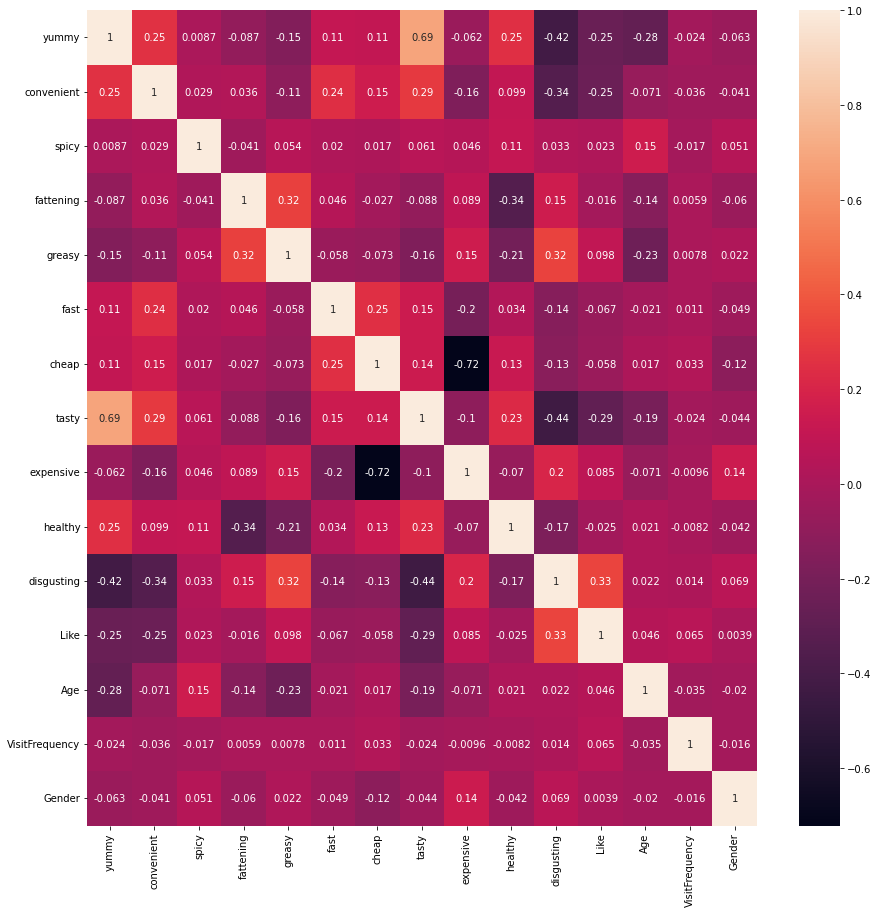

In [41]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

Clearly yummy and tasty attributes are highly Correlated and disgusting and tasty/yummy are highly negatively correlated.

Customer segmentation - based on pyschographic segmentation:

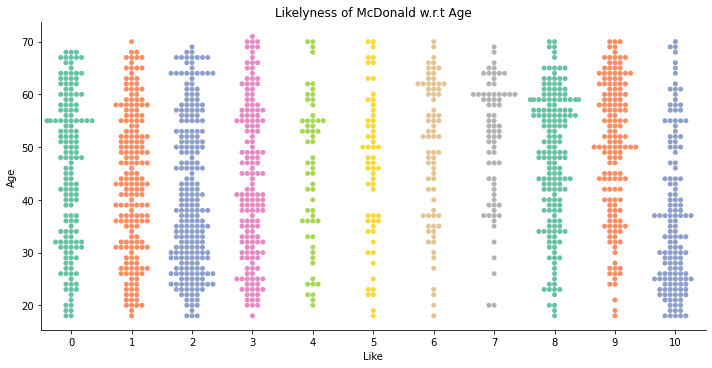

In [42]:
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
sns.catplot(x="Like", y="Age",data=df, orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()

Applying Elbow Method to find appropriate number of clusters:

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


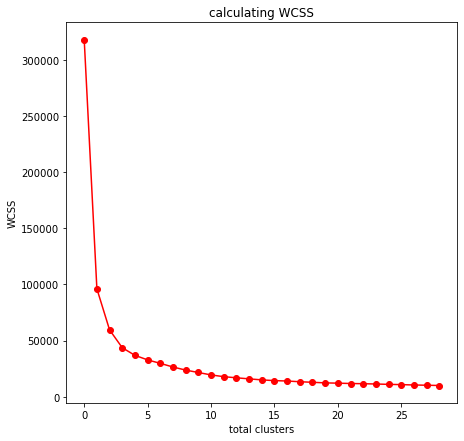

In [43]:
wcss = []
data_model = df.drop(['Gender','tasty'],axis=1)
for ii in range( 1, 30 ):
    kmeans = KMeans(n_clusters=ii, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict( data_model )
    wcss.append( kmeans.inertia_ )
    
plt.plot( wcss, 'ro-', label="WCSS")
plt.title("calculating WCSS")
plt.xlabel("total clusters")
plt.ylabel("WCSS")
plt.show()

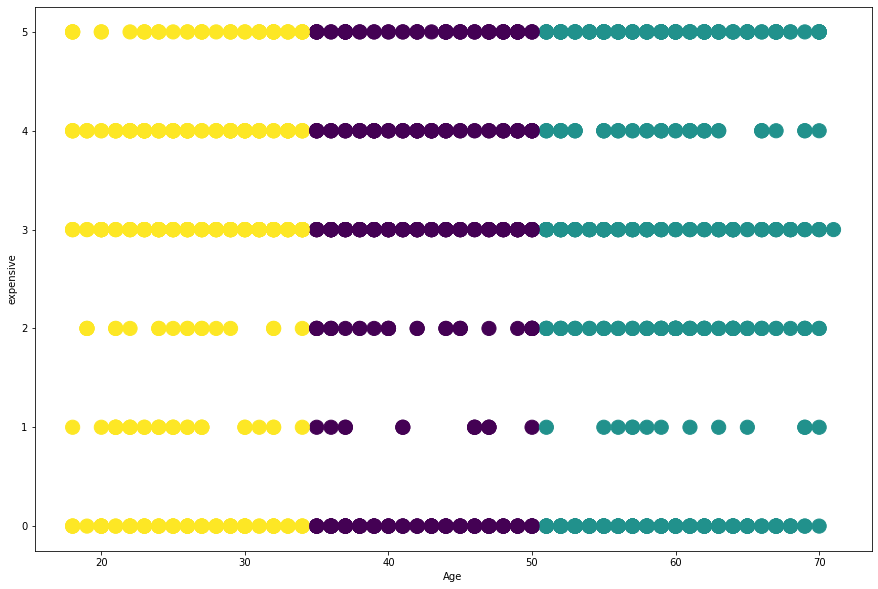

In [49]:
kmeans = KMeans(n_clusters=3)
data_predict = kmeans.fit_predict(data_model)

plt.figure(figsize=(15,10))
plt.scatter( x = 'Age' ,y = 'VisitFrequency' , data = data_model , c = data_predict , s = 200 )
plt.xlabel("Age")
plt.ylabel("expensive")
plt.show()

Clearly 3 is the best amount of Clusters.

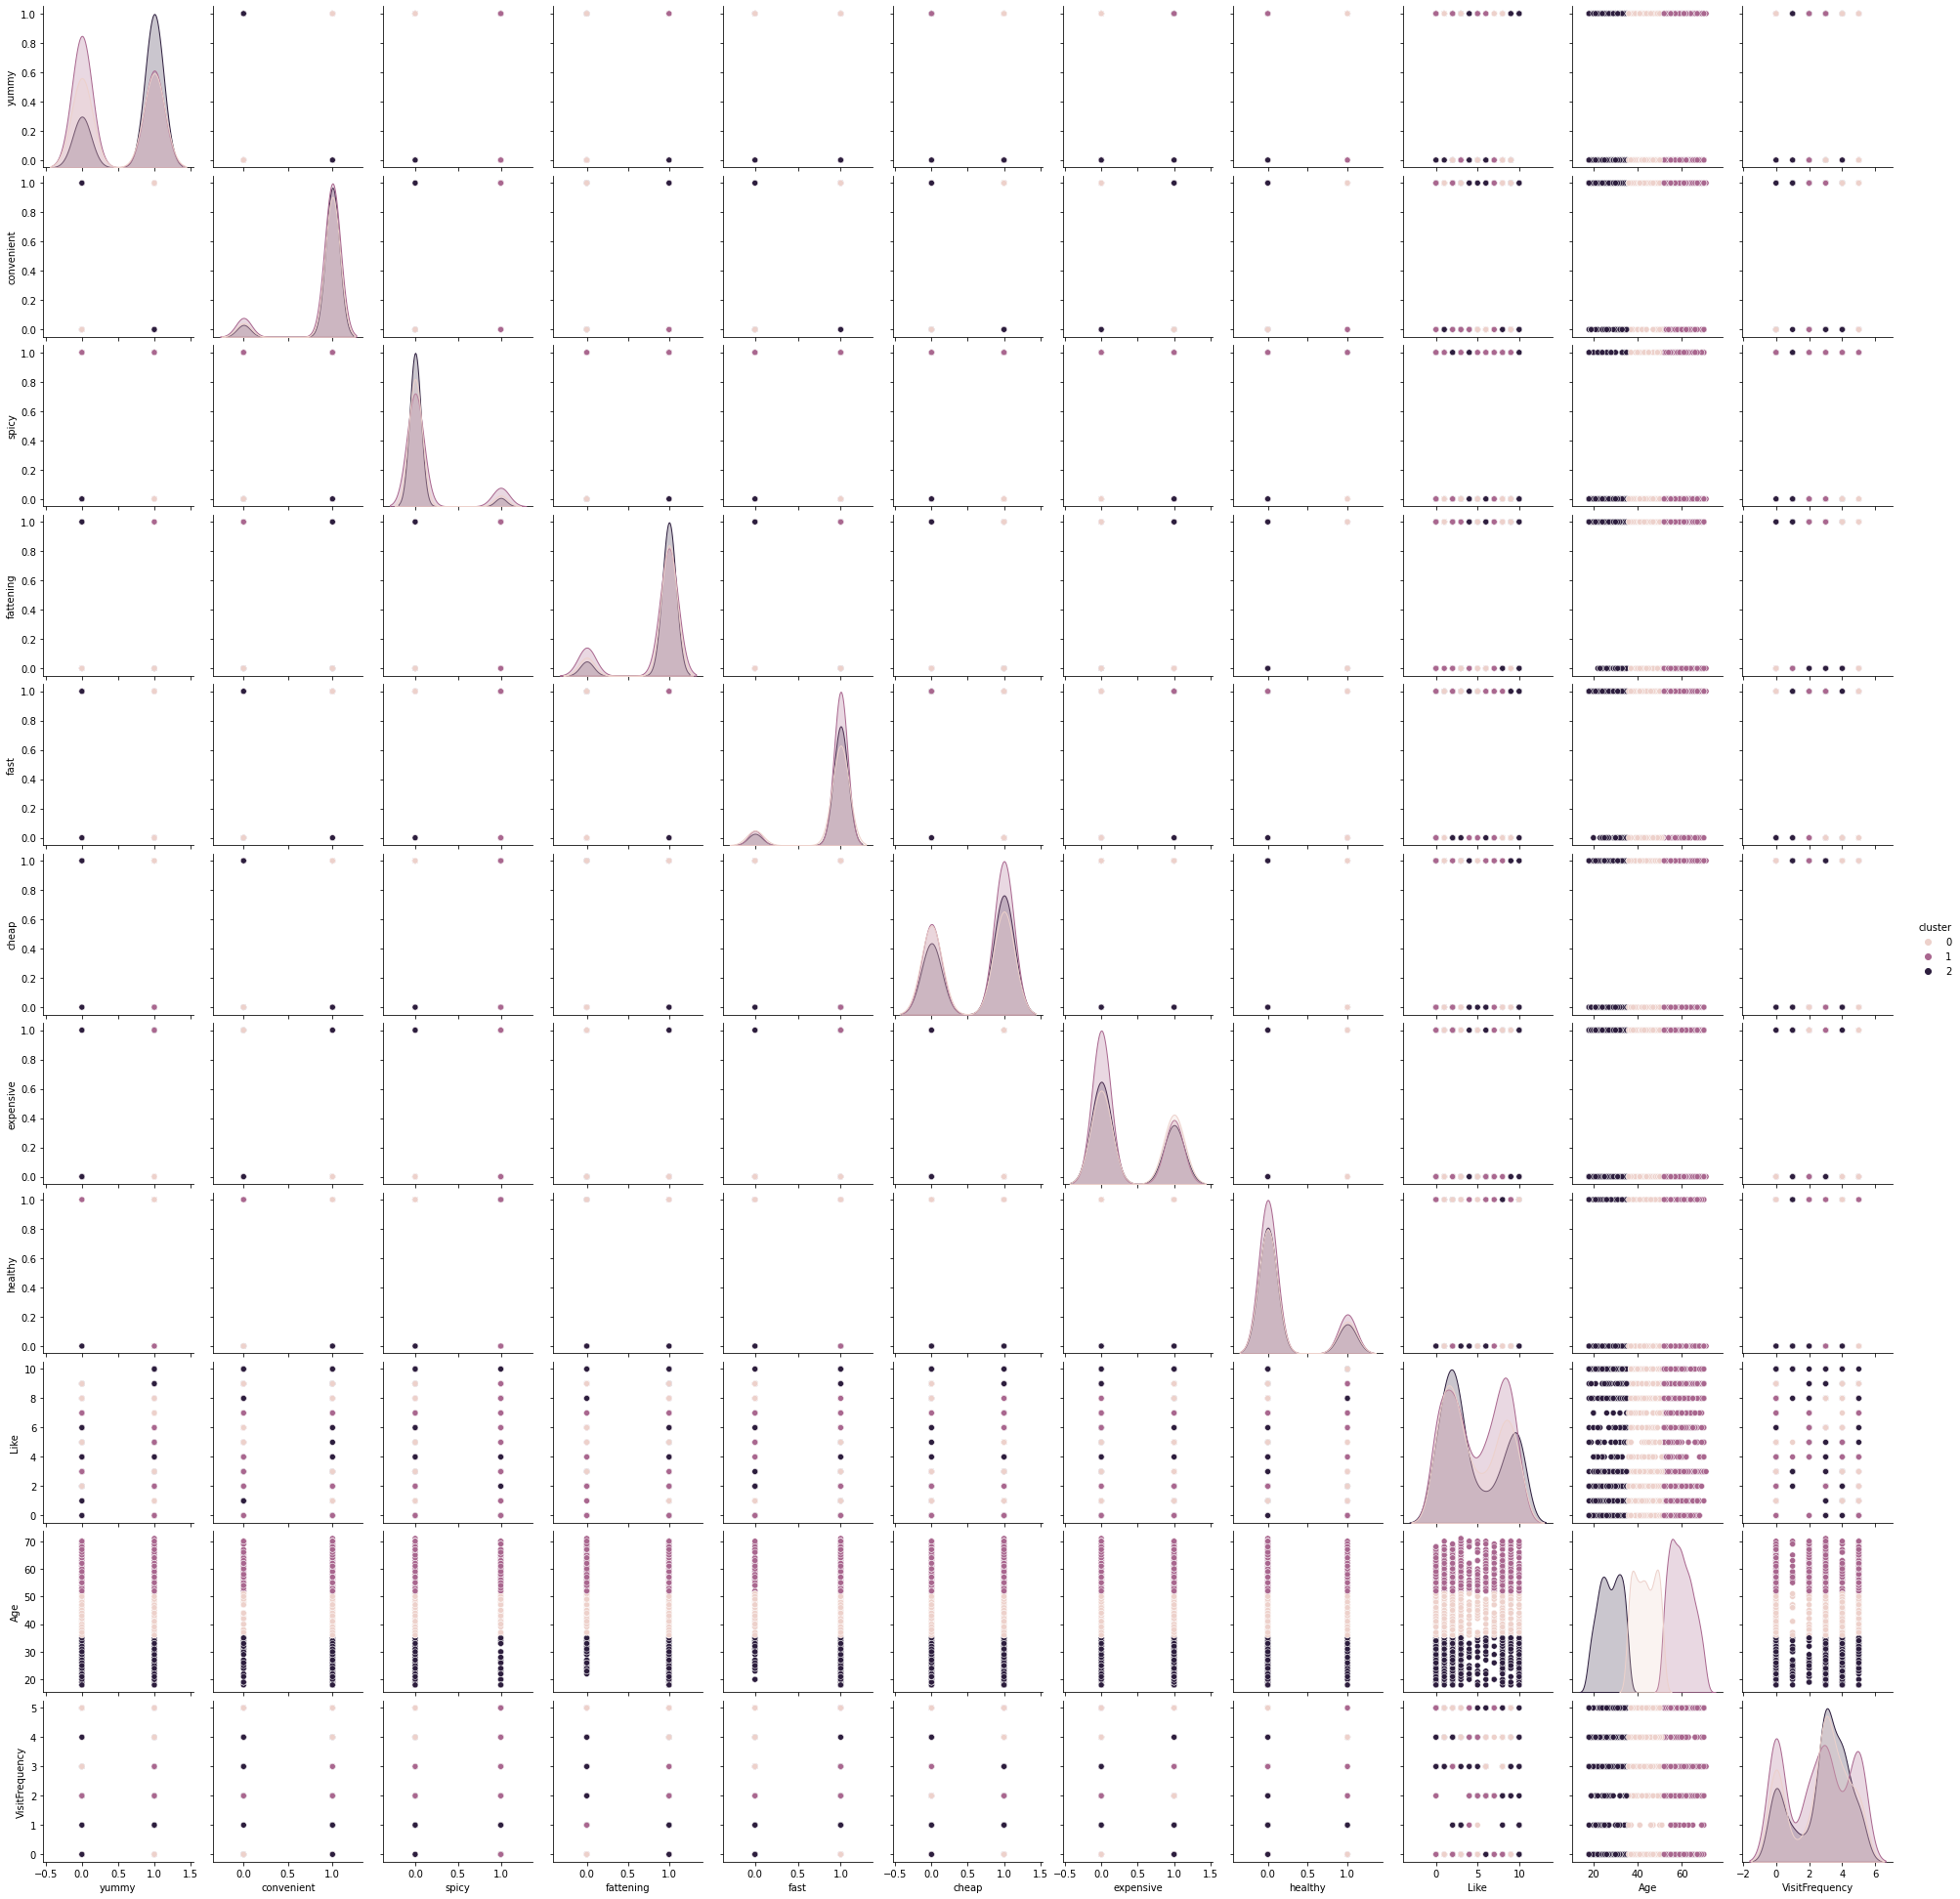

In [47]:
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300) 
y_pred = kmeans.fit_predict( data_model )
import seaborn as sns
best_columns = ["yummy", "convenient", "spicy","fattening", "fast", "cheap","expensive","healthy","Like","Age","VisitFrequency"]
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300) 
best_values = df[best_columns]
y_pred = kmeans.fit_predict( best_values )

df["cluster"] = y_pred
best_columns.append("cluster")
sns.pairplot( df[ best_columns ], hue="cluster")

Data Visualisation of clustering with pairplot.

Label ENCODING AGAIN FOR PCA:

In [50]:
from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,6,61,0,0,1
1,1,1,0,1,1,1,1,1,1,0,0,1,51,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0,1
3,1,1,0,1,1,1,1,1,0,0,1,3,69,4,0,1
4,0,1,0,1,1,1,1,0,0,1,0,1,49,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,9,47,5,1,0
1449,1,1,0,1,0,0,1,1,0,1,0,1,36,4,0,0
1450,1,1,0,1,0,1,0,1,1,0,0,2,52,3,0,1
1451,1,1,0,0,0,1,1,1,0,1,0,3,41,0,1,0


In [51]:
df_eleven = df.loc[:,cat]
df_eleven

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [52]:
x = df.loc[:,cat].values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]], dtype=int64)

In [53]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [54]:
pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_)

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [56]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_eleven.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


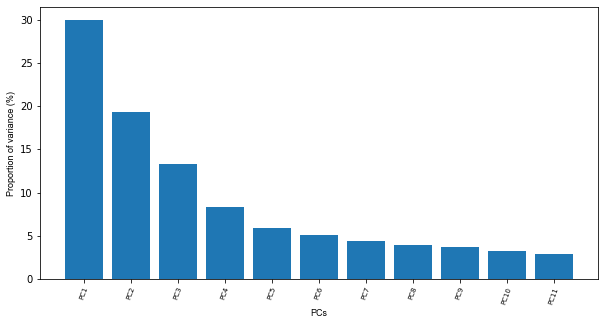

In [57]:
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

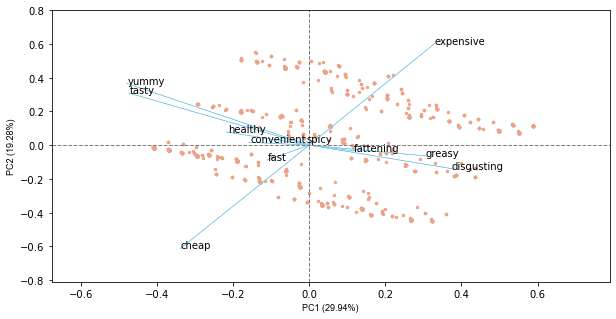

In [58]:
pca_scores = PCA().fit_transform(x)


cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))